# **Klasifikasi dengan ektraksi fitur menggunakan  Latent Dirichlet Allocation**

In [1]:
!pip install gensim

In [2]:
!pip install gensim matplotlib seaborn scikit-learn pandas numpy

In [25]:
!pip install umap-learn

In [14]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Baca data
df_path = "/content/drive/MyDrive/PPW/output/berita_cnn_tokens.csv"
df = pd.read_csv(df_path)

# Cek kolom
df.head()

,id_berita,judul_berita,isi_berita,kategori_berita,cleaned,no_stopwords,stemmed,tokens
0,1,"Dorong Suporter, Andre Onana Dilempar BotolOla...",Kiper Manchester UnitedAndre Onanadilempar bot...,olahraga,kiper manchester unitedandre onanadilempar bot...,kiper manchester unitedandre onanadilempar bot...,kiper manchester unitedandre onanadilempar bot...,"['kiper', 'manchester', 'unitedandre', 'onanad..."
1,2,Militer Nepal Batasi Aktivitas Pascademo Gulin...,Militer Nepalmengambil kembali kendali atas Ka...,internasional,militer nepalmengambil kembali kendali atas ka...,militer nepalmengambil kendali atas kathmandu ...,militer nepalmengambil kendali atas kathmandu ...,"['militer', 'nepalmengambil', 'kendali', 'atas..."
2,3,Dua Helikopter Disiagakan Selama MotoGP Mandal...,Basarnas akan menyiapkan dan menyiagakan dua h...,olahraga,basarnas akan menyiapkan dan menyiagakan dua h...,basarnas menyiapkan menyiagakan helikopter eva...,basarnas siap siaga helikopter evakuasi medis ...,"['basarnas', 'siap', 'siaga', 'helikopter', 'e..."
3,4,"Lari, Rahasia Hidup Sehat untuk Tingkatkan Pro...",Tingginya tuntutan pekerjaan di era yang serba...,gaya-hidup,tingginya tuntutan pekerjaan di era yang serba...,tingginya tuntutan pekerjaan era serba cepat s...,tinggi tuntut kerja era serba cepat seringkali...,"['tinggi', 'tuntut', 'kerja', 'era', 'serba', ..."
4,5,Lokasi Titik Jatuh Helikopter di Mimika Ditemu...,Kepala Badan Nasional Pencarian dan Pertolonga...,nasional,kepala badan nasional pencarian dan pertolonga...,kepala badan nasional pencarian pertolongan ba...,kepala badan nasional cari tolong basarnas mar...,"['kepala', 'badan', 'nasional', 'cari', 'tolon..."


In [7]:
df[['kategori_berita', 'stemmed']].head()

,kategori_berita,stemmed
0,olahraga,kiper manchester unitedandre onanadilempar bot...
1,internasional,militer nepalmengambil kendali atas kathmandu ...
2,olahraga,basarnas siap siaga helikopter evakuasi medis ...
3,gaya-hidup,tinggi tuntut kerja era serba cepat seringkali...
4,nasional,kepala badan nasional cari tolong basarnas mar...


In [8]:
# Melihat daftar kategori unik
print(df['kategori_berita'].unique())

# Menghitung jumlah kategori unik
print("Jumlah kategori:", df['kategori_berita'].nunique())

# Kalau mau lihat jumlah data per kategori
print(df['kategori_berita'].value_counts())

['olahraga' 'internasional' 'gaya-hidup' 'nasional' 'tv' 'ekonomi'
 'hiburan' 'otomotif' 'edukasi' 'teknologi']
Jumlah kategori: 10
kategori_berita
nasional         250
ekonomi          162
olahraga         160
internasional    111
tv                76
gaya-hidup        64
hiburan           48
edukasi           35
teknologi         30
otomotif          23
Name: count, dtype: int64


## **Siapkan data untuk LDA**

In [15]:
# Ubah string list token menjadi list Python
import ast
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Buat kamus (dictionary) dan corpus untuk Gensim
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

print("Jumlah dokumen:", len(corpus))
print("Jumlah kata unik:", len(dictionary))

Jumlah dokumen: 959
Jumlah kata unik: 14586


## **Training Model LDA**

In [16]:
# Tentukan jumlah topik (bisa kamu sesuaikan)
num_topics = 10

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha='auto'
)

for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print(f"\nTopik {i+1}:")
    print(", ".join([word for word, prob in topic]))




Topik 1:
orang, sebut, korban, laku, kata, temu, jadi, jalan, warga, satu

Topik 2:
menteri, purbaya, jadi, haji, uang, prabowo, ganti, presiden, ekonomi, sebut

Topik 3:
rp, tahun, sebut, jadi, lalu, kerja, kata, anggota, juta, dpr

Topik 4:
menteri, jadi, presiden, jabat, sri, nepal, kata, perintah, prabowo, mulyani

Topik 5:
lebih, jadi, makan, tubuh, sehat, konsumsi, baik, buat, banyak, orang

Topik 6:
iphone, apple, baru, lebih, marquez, jadi, hadir, besar, pro, saham

Topik 7:
tni, negara, kata, hukum, jadi, laku, sebut, indonesia, ferry, persen

Topik 8:
indonesia, main, serang, jadi, israel, u, timnas, laga, piala, lebanon

Topik 9:
shell, jadi, kata, usaha, rp, umkm, sebut, indonesia, harga, laku

Topik 10:
kata, sebut, jadi, laku, orang, korban, ada, tahun, jalan, lalu


## **Ubah hasil LDA menjadi fitur numerik**

In [17]:
def get_topic_distribution(lda_model, corpus):
    topic_features = []
    for doc in corpus:
        topic_dist = [0] * lda_model.num_topics
        for topic_num, prob in lda_model.get_document_topics(doc):
            topic_dist[topic_num] = prob
        topic_features.append(topic_dist)
    return np.array(topic_features)

X_lda = get_topic_distribution(lda_model, corpus)
y = df['kategori_berita']

print("Ekstraksi fitur LDA selesai.")
X_lda.shape

Ekstraksi fitur LDA selesai.


(959, 10)

In [18]:
# Gabungkan hasil LDA dengan kategori berita
df_lda = pd.DataFrame(X_lda, columns=[f"Topik_{i+1}" for i in range(X_lda.shape[1])])
df_lda['kategori_berita'] = df['kategori_berita'].values

# Lihat 5 baris pertama
df_lda.head()


,Topik_1,Topik_2,Topik_3,Topik_4,Topik_5,Topik_6,Topik_7,Topik_8,Topik_9,Topik_10,kategori_berita
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.425846,0.0,0.572415,olahraga
1,0.000000,0.151152,0.000000,0.847508,0.000000,0.000000,0.0,0.000000,0.0,0.000000,internasional
2,0.234866,0.568305,0.000000,0.000000,0.000000,0.186865,0.0,0.000000,0.0,0.000000,olahraga
3,0.069962,0.000000,0.000000,0.000000,0.922891,0.000000,0.0,0.000000,0.0,0.000000,gaya-hidup
4,0.398576,0.000000,0.247152,0.000000,0.353000,0.000000,0.0,0.000000,0.0,0.000000,nasional


## **Bagi Data Train dan Test**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Jumlah data latih: {len(X_train)}, data uji: {len(X_test)}")


Jumlah data latih: 767, data uji: 192


## **Training Model SVM**

In [20]:
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

print("Model SVM berhasil dilatih dengan fitur hasil ekstraksi LDA.")

Model SVM berhasil dilatih dengan fitur hasil ekstraksi LDA.


## **Evaluasi Model**

In [21]:
y_pred = svm_model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.5208333333333334

Laporan Klasifikasi:
                precision    recall  f1-score   support

      edukasi       0.00      0.00      0.00         7
      ekonomi       0.50      0.44      0.47        32
   gaya-hidup       0.69      0.85      0.76        13
      hiburan       0.00      0.00      0.00        10
internasional       0.36      0.36      0.36        22
     nasional       0.49      0.68      0.57        50
     olahraga       0.59      0.84      0.69        32
     otomotif       0.00      0.00      0.00         5
    teknologi       0.67      1.00      0.80         6
           tv       0.00      0.00      0.00        15

     accuracy                           0.52       192
    macro avg       0.33      0.42      0.37       192
 weighted avg       0.42      0.52      0.46       192



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Visualisasi Confusion Matrix**

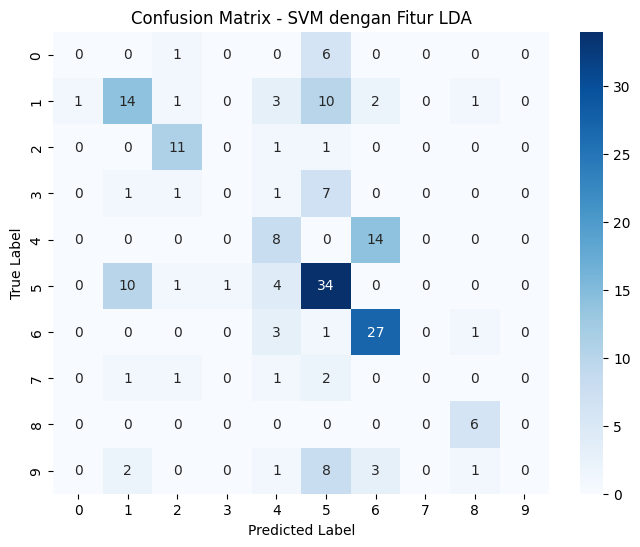

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM dengan Fitur LDA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Distribusi Topik per Kategori**

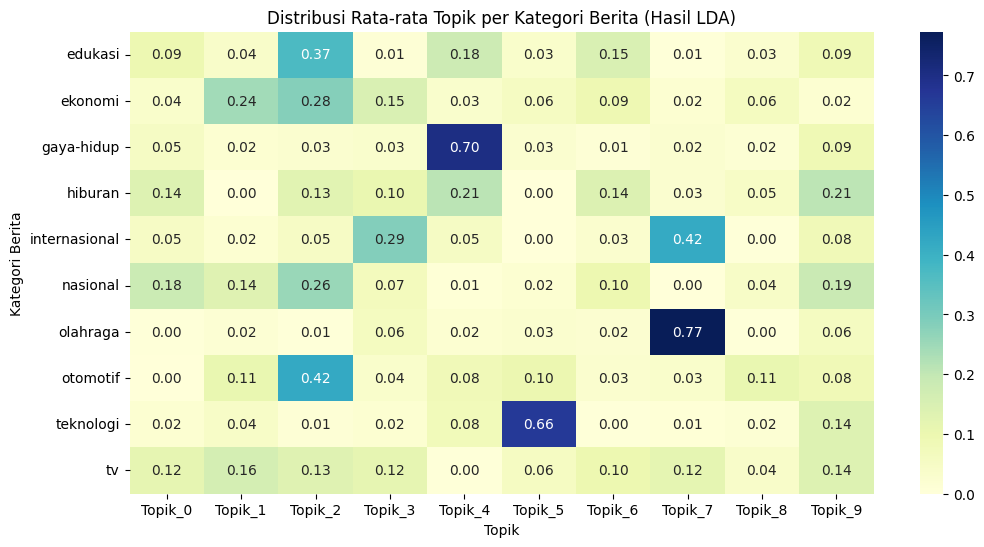

In [23]:
topic_df = pd.DataFrame(X_lda, columns=[f"Topik_{i}" for i in range(num_topics)])
topic_df["Kategori"] = y.values

topic_by_category = topic_df.groupby("Kategori").mean()

plt.figure(figsize=(12,6))
sns.heatmap(topic_by_category, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Distribusi Rata-rata Topik per Kategori Berita (Hasil LDA)")
plt.xlabel("Topik")
plt.ylabel("Kategori Berita")
plt.show()


## **Topik Dominan per Dokumen**

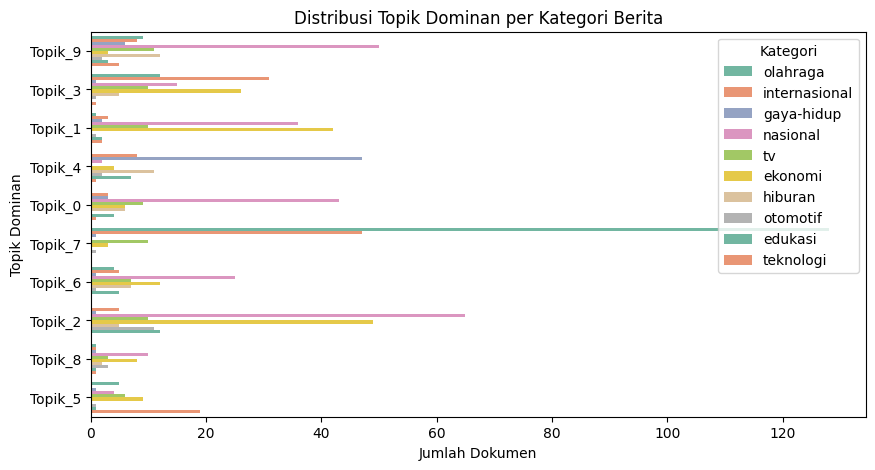

In [24]:
topic_df["Topik_Dominan"] = topic_df[[f"Topik_{i}" for i in range(num_topics)]].idxmax(axis=1)

plt.figure(figsize=(10,5))
sns.countplot(y="Topik_Dominan", hue="Kategori", data=topic_df, palette="Set2")
plt.title("Distribusi Topik Dominan per Kategori Berita")
plt.xlabel("Jumlah Dokumen")
plt.ylabel("Topik Dominan")
plt.legend(title="Kategori")
plt.show()


## **Proyeksi 2D Data LDA**

In [26]:
import umap
# Buat model UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)

# Fit-transform untuk data training dan test
X_train_2d = umap_model.fit_transform(X_train)
X_test_2d = umap_model.transform(X_test)

# Simpan hasil proyeksi ke DataFrame
train_umap = pd.DataFrame(X_train_2d, columns=['x', 'y'])
train_umap['Kategori'] = y_train.values

test_umap = pd.DataFrame(X_test_2d, columns=['x', 'y'])
test_umap['Kategori'] = y_test.values


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## **Visualisasi**

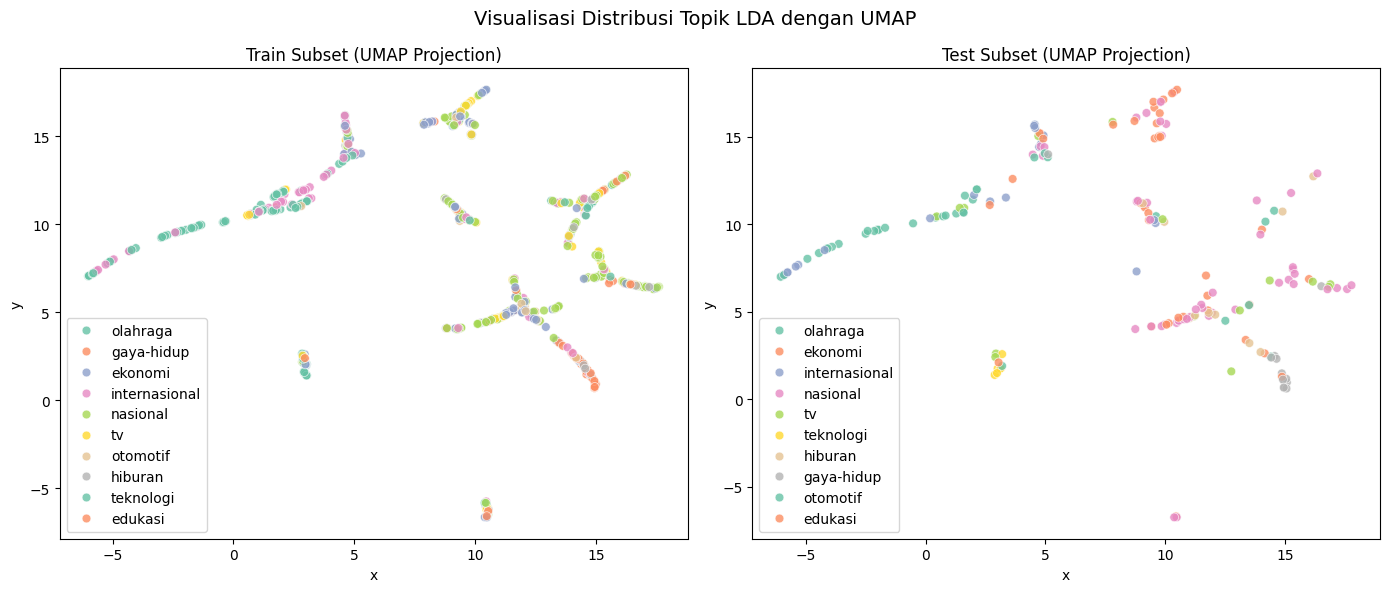

In [27]:
plt.figure(figsize=(14,6))

# Plot subset training
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=train_umap,
    x='x', y='y',
    hue='Kategori',
    palette='Set2',
    s=40,
    alpha=0.8
)
plt.title('Train Subset (UMAP Projection)')
plt.legend(loc='best')

# Plot subset testing
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=test_umap,
    x='x', y='y',
    hue='Kategori',
    palette='Set2',
    s=40,
    alpha=0.8
)
plt.title('Test Subset (UMAP Projection)')
plt.legend(loc='best')

plt.suptitle('Visualisasi Distribusi Topik LDA dengan UMAP', fontsize=14)
plt.tight_layout()
plt.show()
